<a href="https://colab.research.google.com/github/andresvillamayor/MachineLearning-Pro/blob/main/nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from  google.colab import drive 

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/My Drive/ML/reviews_original.csv", sep="|",  engine="python")

In [ ]:
data.head()

,estrella,texto,lugar
0,40,Abierto durante el dia normalment con alguien ...,recoleta
1,10,No se puede creer que un lugar historico y emb...,recoleta
2,40,Este cementerio esta ubicado en el corazon de ...,recoleta
3,30,"La iglesia y el cementerio de antaño, recomend...",recoleta
4,20,Con el correr del tiempo y el rapido crecimien...,recoleta


In [ ]:
import matplotlib.pyplot as plt

(array([  88.,    0.,  180.,    0.,    0.,  975.,    0., 2122.,    0.,
        2648.]),
 array([10., 14., 18., 22., 26., 30., 34., 38., 42., 46., 50.]),
 <a list of 10 Patch objects>)

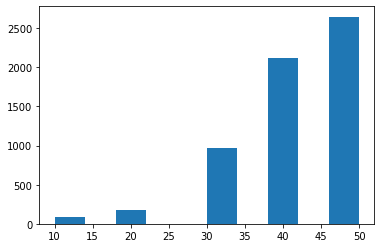

In [ ]:
plt.hist(data['estrella'])

In [ ]:
data['texto'] = data['texto'].str.strip()
data.head()

,estrella,texto,lugar
0,40,Abierto durante el dia normalment con alguien ...,recoleta
1,10,No se puede creer que un lugar historico y emb...,recoleta
2,40,Este cementerio esta ubicado en el corazon de ...,recoleta
3,30,"La iglesia y el cementerio de antaño, recomend...",recoleta
4,20,Con el correr del tiempo y el rapido crecimien...,recoleta


In [ ]:
from bs4 import BeautifulSoup
import re
#######
#from nltk.corpus import stopwords
#from nltk import word_tokenize
#from string import punctuation
#spanish_stopwords = stopwords.words('spanish')
#lista de valores para quita( puntos, comas, dos puntos )
#non_words = list(punctuation)
#agregar valores 
#non_words.extend(['¿', '¡','rt','RT','➡','🦠','"','""'])
#non_words.extend(map(str,range(10)))
# vector_texto = []
    # normalizamos a minusculas
    #tokens = [w.lower() for w in tokens]
    # colocamos el stopwords
    #tokens =  [w for w in tokens if not w in spanish_stopwords]
    #for item in tokens:
        #vector_texto.append((item))  
    #return vector_texto


    # normalizamos a minusculas
    #tokens = [w.lower() for w in tokens]
    # colocamos el stopwords
    #tokens =  [w for w in tokens if not w in spanish_stopwords]
#
#
#
#
#
#

def clean_text(text):
    text = BeautifulSoup(text, "lxml").get_text()
    # Eliminamos la @ y su mención
    text = re.sub(r"@[A-Za-z0-9]+", ' ', text)
    # Eliminamos los links de las URLs
    text = re.sub(r"https?://[A-Za-z0-9./]+", ' ', text)
    # Nos quedamos solamente con los caracteres
   

    text = re.sub(r"\.\.?\.?\s?", ' ', text)
    text = re.sub('([A-Za-z])\,([A-Za-z])', '\\1, \\2', text)
    text = re.sub('([A-Za-z])\!([A-Za-z])', '\\1! \\2', text)
   
    text = re.sub(r"[^a-zA-ZñÑ.!?']", ' ', text)
    # Eliminamos espacios en blanco adicionales
    text = re.sub(r" +", ' ', text)
    return text


   

In [ ]:
data_clean = [clean_text(text) for text in data['texto']]

In [ ]:
data.iloc[1006]["texto"]

'Un buen local historico del Paraguay. La historia del pueblo paraguayo y sus heroes. Muy central y facil aceso. Un buen recuerdo del pasado historico del pays.'

In [ ]:
len(data_clean), data_clean[1003]

(6013,
 'El Panteon Nacional de los Heroes es sin duda uno de los atractivos mas interesantes de la Ciudad de Asuncion El edificio esta custodiado de manera simbolica por dos soldados con sus uniformes de antaño Las placas que conmeran eventos distinciones y reconocimientos asi como las estatuas de los heroes son muy interesante de ver con detenimiento Es una visita emotiva para quienes aprecian de la historia! Absolutamente recomendable!')